In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [3]:
def landnum_modifier(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x).replace('외', '').replace(' ','')
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [4]:
def yunrip_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/연립다세대/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
    
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [5]:
def officetel_data_prep():
    basedir = './국토교통부_실거래가_공개시스템/오피스텔/매매/'
    filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('(' in f)]
    
    dfs_list = []
    for i, f in tqdm(enumerate(filenames)):
        df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
        if '해제사유발생일' in df.columns.tolist():
            df = df.drop(columns=['해제사유발생일'])

        dfs_list.append(df)
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)
    
    concat_df['계약년월'] = concat_df['계약년월'].apply(str)
    concat_df['계약일'] = concat_df['계약일'].apply(str)
    
    concat_df['건물연식'] = concat_df['계약년월'].apply(lambda x: int(x[:4])) - concat_df['건축년도']
    
    concat_df['계약일'] = concat_df['계약일'].apply(day_modifier)
    
    concat_df['계약날짜'] = concat_df['계약년월'].apply(lambda x: x[:4]) + '-' + concat_df['계약년월'].apply(lambda x: x[-2:])\
    + '-' + concat_df['계약일']
    
    concat_df['계약날짜'] = pd.to_datetime(concat_df['계약날짜'], format='%Y-%m-%d')
    
    concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
    concat_df['전용면적단가(만원/㎡)'] = concat_df['거래금액(만원)'] / concat_df['전용면적(㎡)']
    
    concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']
    
    concat_df['년'] = concat_df['계약날짜'].dt.year
    
    cols_to_drop = ['시군구', '번지', '본번', '부번', '지번주소', '계약년월', '계약일', '도로명']
    
    concat_df = concat_df[concat_df['년'] >= 2015]
        
    return concat_df[['지번주소'] + [col for col in concat_df.columns if col not in cols_to_drop]]

In [6]:
yunrip_df = yunrip_data_prep().dropna().reset_index(drop=True)
print(yunrip_df.shape)
yunrip_df.head()

16it [00:01, 11.35it/s]


(329064, 11)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 1216-4,(1216-4),33.77,21.67,24800,4,2012.0,3.0,2015-03-26,734.379627,2015
1,서울특별시 강남구 개포동 1216-4,(1216-4),35.87,23.02,27200,4,2012.0,3.0,2015-06-23,758.293839,2015
2,서울특별시 강남구 개포동 1216-4,(1216-4),29.12,18.68,22200,4,2012.0,3.0,2015-07-20,762.362637,2015
3,서울특별시 강남구 개포동 1216-4,(1216-4),29.97,19.23,22500,3,2012.0,3.0,2015-08-06,750.750751,2015
4,서울특별시 강남구 개포동 170-18,(170-18),26.60,21.53,21000,1,1988.0,27.0,2015-08-21,789.473684,2015


In [7]:
officetel_df = officetel_data_prep().dropna().reset_index(drop=True)
print(officetel_df.shape)
officetel_df.head()

16it [00:00, 38.55it/s]


(76332, 10)


,지번주소,단지명,전용면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년
0,서울특별시 강남구 개포동 13-3,대청타워,43.24,22000,14,1997.0,18.0,2015-01-08,508.788159,2015
1,서울특별시 강남구 개포동 13-3,대청타워,32.44,15800,21,1997.0,18.0,2015-01-12,487.053021,2015
2,서울특별시 강남구 개포동 13-3,대청타워,32.44,16000,10,1997.0,18.0,2015-01-19,493.218249,2015
3,서울특별시 강남구 개포동 13-3,대청타워,32.44,15400,21,1997.0,18.0,2015-01-26,474.722565,2015
4,서울특별시 강남구 개포동 13-3,대청타워,31.91,16000,26,1997.0,18.0,2015-01-28,501.410216,2015


In [8]:
def land_shape2(x):
    # x is a string
    
    if pd.isna(x) == True:
        return x
    else:
        if '사다리' in x:
            return '사다리형'
        elif '장방' in x:
            return '장방형'
        elif '정방' in x:
            return '정방형'
        elif '부정' in x:
            return '부정형'
        elif '않음' in x:
            return '지정되지않음'
        elif '자루' in x:
            return '자루형'
        elif '삼각' in x:
            return '삼각형'
        else:
            return '기타'

In [9]:
land_specs_df = pd.read_csv('./prepped_data/land_specs_ver_4.csv')
land_specs_df['지형형상2'] = land_specs_df['지형형상'].apply(land_shape2)
print(land_specs_df.shape)
land_specs_df.head()

(8706295, 12)


,지번주소,년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,공시지가,지형형상2
0,서울특별시 강남구 개포동 100-0,2013,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,325000.0,부정형
1,서울특별시 강남구 개포동 100-0,2014,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,330000.0,부정형
2,서울특별시 강남구 개포동 100-0,2015,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,335000.0,부정형
3,서울특별시 강남구 개포동 100-0,2016,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,345000.0,부정형
4,서울특별시 강남구 개포동 100-0,2017,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,355000.0,부정형


In [11]:
last_df = land_specs_df.drop_duplicates(subset=['지번주소'], keep='last').drop(columns=['년', '공시지가']).reset_index(drop=True)
print(last_df.shape)
last_df.head()

(981464, 10)


,지번주소,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,서울특별시 강남구 개포동 100-0,전,876.0,자연녹지지역,지정되지않음,전,완경사,부정형,맹지,부정형
1,서울특별시 강남구 개포동 101-0,전,641.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
2,서울특별시 강남구 개포동 102-0,전,509.0,자연녹지지역,지정되지않음,전,평지,부정형,맹지,부정형
3,서울특별시 강남구 개포동 103-0,전,48.7,자연녹지지역,개발제한구역,전,평지,부정형,맹지,부정형
4,서울특별시 강남구 개포동 104-1,전,2995.0,개발제한구역,자연녹지지역,전,완경사,부정형,맹지,부정형


In [18]:
yunrip_merge_df = yunrip_df.merge(last_df, on=['지번주소']).reset_index(drop=True)
officetel_merge_df = officetel_df.merge(last_df, on=['지번주소']).reset_index(drop=True)

In [55]:
target = '상도동'
target_year = 2019

In [56]:
target_df = yunrip_merge_df[(yunrip_merge_df['지번주소'].str.contains(target))&(yunrip_merge_df['계약날짜'].dt.year >= target_year)&
                      (yunrip_merge_df['건물연식'] <= 5)
                     ]
print(target_df.shape)
target_df.head()

(526, 20)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
74086,서울특별시 동작구 상도동 279-418,다솜그랑빌,29.88,18.32,28800,3,2019.0,1.0,2020-05-01,963.855422,2020,대,100.0,제2종일반주거지역,지정되지않음,다세대,완경사,세로장방,소로각지,장방형
74087,서울특별시 동작구 상도동 279-418,다솜그랑빌,29.88,18.32,28800,3,2019.0,2.0,2021-03-23,963.855422,2021,대,100.0,제2종일반주거지역,지정되지않음,다세대,완경사,세로장방,소로각지,장방형
74179,서울특별시 동작구 상도동 256-196,256-196,47.89,29.47,35000,1,2015.0,4.0,2019-09-14,730.841512,2019,대,354.0,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
74180,서울특별시 동작구 상도동 256-196,256-196,49.67,30.57,36600,1,2015.0,4.0,2019-12-03,736.863298,2019,대,354.0,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형
74181,서울특별시 동작구 상도동 256-196,256-196,52.20,32.13,33600,1,2015.0,5.0,2020-07-08,643.678161,2020,대,354.0,제2종일반주거지역,지정되지않음,다세대,완경사,가로장방,세로한면(가),장방형


In [22]:
target_df['도로접면'].value_counts()

세로한면(가)    518
세로각지(가)    132
세로한면(불)     48
소로한면        43
소로각지        30
중로각지        10
중로한면         3
세로각지(불)      2
Name: 도로접면, dtype: int64

<AxesSubplot:ylabel='전용면적단가(만원/㎡)'>

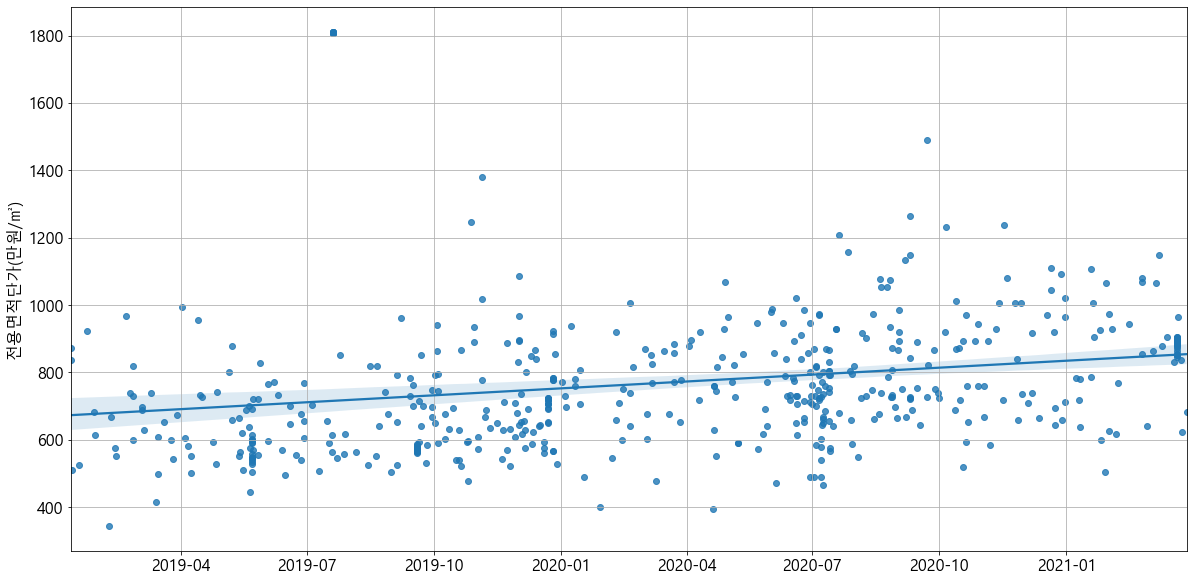

In [77]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

<AxesSubplot:ylabel='전용면적단가(만원/㎡)'>

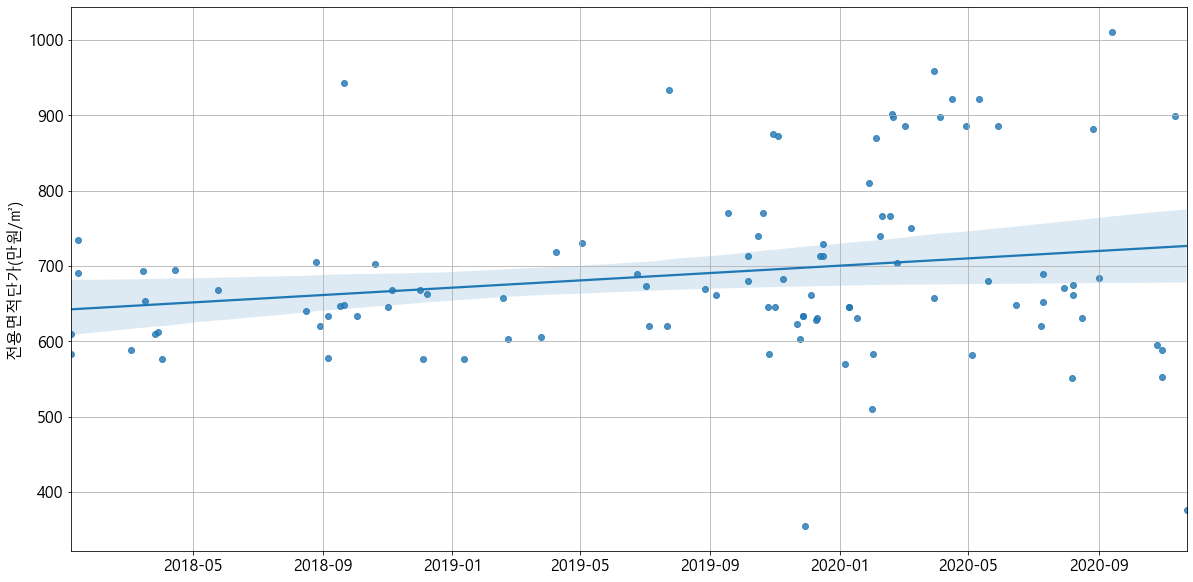

In [79]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_officetel_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_officetel_df['계약날짜']), y=guro_officetel_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [84]:
summary_df = guro_officetel_df[['지번주소', '평균단가']].drop_duplicates().reset_index(drop=True)
print(summary_df.shape)
summary_df

(16, 2)


,지번주소,평균단가
0,서울특별시 구로구 구로동 104-6,639.906923
1,서울특별시 구로구 구로동 104-3,617.435159
2,서울특별시 구로구 구로동 97-0,590.921163
3,서울특별시 구로구 구로동 44-8,643.745624
4,서울특별시 구로구 구로동 97-8,818.326693
5,서울특별시 구로구 구로동 106-2,597.216837
6,서울특별시 구로구 구로동 104-8,664.398345
7,서울특별시 구로구 구로동 98-12,687.053550
8,서울특별시 구로구 구로동 642-88,375.554797
9,서울특별시 구로구 구로동 98-14,667.470127


In [39]:
hanmyun_df = yunrip_merge_df[(yunrip_merge_df['도로접면'].str.contains('한면'))&(yunrip_merge_df['건물연식'] <= 5)]
print(hanmyun_df.shape)
hanmyun_df.head()

(64851, 20)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
15,서울특별시 강남구 개포동 1169-5,RAON,47.190,28.71,46500,3,2015.0,0.0,2015-10-22,985.378258,2015,대,271.5,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
16,서울특별시 강남구 개포동 1169-5,RAON,39.415,23.98,41700,6,2015.0,0.0,2015-10-28,1057.972853,2015,대,271.5,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
17,서울특별시 강남구 개포동 1169-5,RAON,47.190,28.71,44900,2,2015.0,0.0,2015-10-29,951.472770,2015,대,271.5,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
18,서울특별시 강남구 개포동 1169-5,RAON,47.190,28.71,46000,4,2015.0,0.0,2015-11-04,974.782793,2015,대,271.5,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형
19,서울특별시 강남구 개포동 1169-5,RAON,47.190,28.71,46000,2,2015.0,0.0,2015-11-24,974.782793,2015,대,271.5,제2종일반주거지역,지정되지않음,상업기타,평지,정방형,소로한면,정방형


In [40]:
gagzi_df = yunrip_merge_df[yunrip_merge_df['도로접면'].str.contains('각지')&(yunrip_merge_df['건물연식'] <= 5)]
print(gagzi_df.shape)
gagzi_df.head()

(31597, 20)


,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
0,서울특별시 강남구 개포동 1216-4,(1216-4),33.77,21.67,24800,4,2012.0,3.0,2015-03-26,734.379627,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),정방형
1,서울특별시 강남구 개포동 1216-4,(1216-4),35.87,23.02,27200,4,2012.0,3.0,2015-06-23,758.293839,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),정방형
2,서울특별시 강남구 개포동 1216-4,(1216-4),29.12,18.68,22200,4,2012.0,3.0,2015-07-20,762.362637,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),정방형
3,서울특별시 강남구 개포동 1216-4,(1216-4),29.97,19.23,22500,3,2012.0,3.0,2015-08-06,750.750751,2015,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),정방형
4,서울특별시 강남구 개포동 1216-4,(1216-4),36.52,23.44,26000,2,2012.0,4.0,2016-02-19,711.938664,2016,대,257.0,제2종일반주거지역,지정되지않음,다세대,평지,정방형,세로각지(가),정방형


In [41]:
hanmyun_df['전용면적단가(만원/㎡)'].describe()

count    64851.000000
mean       699.608610
std        260.572899
min         65.034656
25%        523.244114
50%        639.835995
75%        816.593601
max       3834.979663
Name: 전용면적단가(만원/㎡), dtype: float64

In [42]:
gagzi_df['전용면적단가(만원/㎡)'].describe()

count    31597.000000
mean       718.858293
std        260.468499
min        158.700170
25%        539.991880
50%        659.382065
75%        838.074398
max       3119.209389
Name: 전용면적단가(만원/㎡), dtype: float64

In [45]:
gagzi_df['전용면적단가(만원/㎡)'].median() / hanmyun_df['전용면적단가(만원/㎡)'].median()

1.030548562671001

In [58]:
guro_df = yunrip_merge_df[(yunrip_merge_df['지번주소'].str.contains('구로동'))&
                          (yunrip_merge_df['계약날짜'].dt.year >= target_year)&
                          (yunrip_merge_df['건물연식'] <= 5)
                         ]
print(guro_df.shape)

(236, 20)


In [59]:
guro_df.head()

,지번주소,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,건물연식,계약날짜,전용면적단가(만원/㎡),년,지목명,토지면적,용도지역명1,용도지역명2,토지이동상황,지형높이,지형형상,도로접면,지형형상2
48615,서울특별시 구로구 구로동 409-65,퍼스트빌라,21.36,14.50,14800,5,2016.0,4.0,2020-05-26,692.883895,2020,대,238.0,제2종일반주거지역,지정되지않음,다세대,완경사,사다리형,세로한면(불),사다리형
48616,서울특별시 구로구 구로동 409-65,퍼스트빌라,42.78,29.03,20000,2,2016.0,4.0,2020-06-30,467.508181,2020,대,238.0,제2종일반주거지역,지정되지않음,다세대,완경사,사다리형,세로한면(불),사다리형
48626,서울특별시 구로구 구로동 409-83,(409-83),26.14,16.60,16750,2,2015.0,4.0,2019-08-26,640.780413,2019,대,213.0,제2종일반주거지역,지정되지않음,다세대,평지,사다리형,세로각지(가),사다리형
48627,서울특별시 구로구 구로동 409-83,(409-83),19.90,12.64,15200,4,2015.0,5.0,2020-03-31,763.819095,2020,대,213.0,제2종일반주거지역,지정되지않음,다세대,평지,사다리형,세로각지(가),사다리형
48634,서울특별시 구로구 구로동 429-27,미라벨,30.95,18.40,21000,2,2016.0,3.0,2019-10-14,678.513732,2019,대,502.0,제2종일반주거지역,지정되지않음,단독,평지,세로장방,세로각지(가),장방형


In [60]:
guro_df['전용면적단가(만원/㎡)'].describe()

count     236.000000
mean      706.216268
std       146.448356
min       173.847317
25%       613.806903
50%       676.132534
75%       799.605608
max      1133.333333
Name: 전용면적단가(만원/㎡), dtype: float64

<AxesSubplot:>

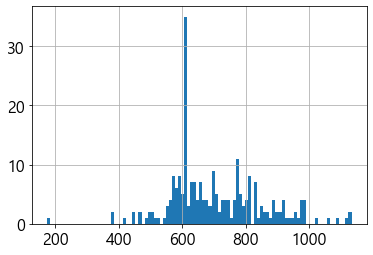

In [61]:
guro_df['전용면적단가(만원/㎡)'].hist(bins=100)

<AxesSubplot:ylabel='전용면적단가(만원/㎡)'>

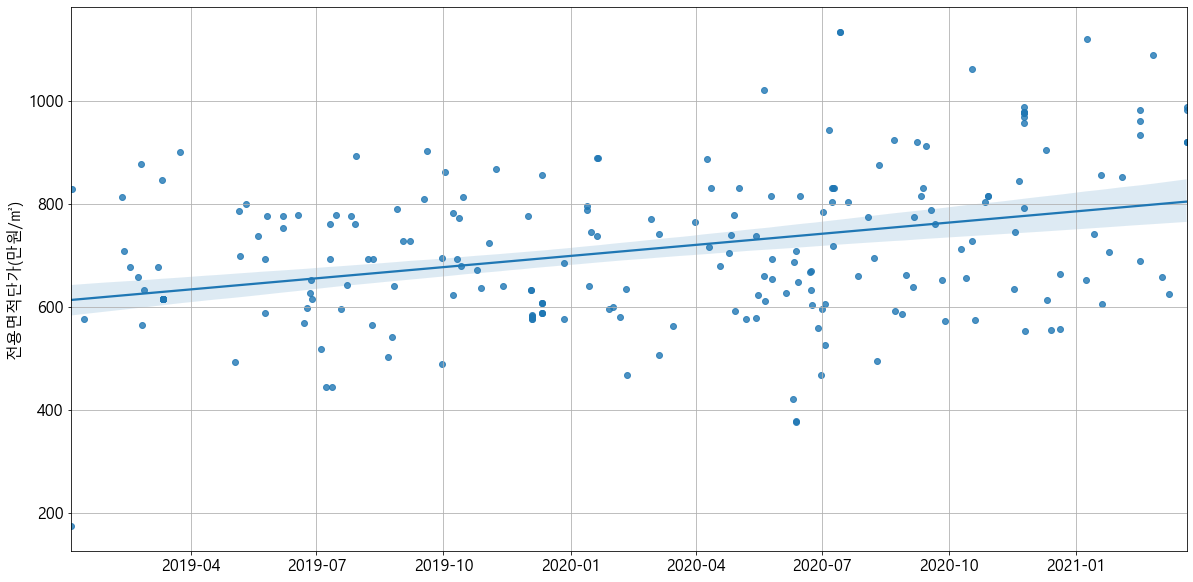

In [62]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_df['계약날짜']), y=guro_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [78]:
guro_officetel_df = officetel_merge_df[(officetel_merge_df['지번주소'].str.contains('구로동'))&
                                       (officetel_merge_df['계약날짜'].dt.year <= 2020)&
                                       (officetel_merge_df['계약날짜'].dt.year >= 2018)&
                                       (officetel_merge_df['건물연식'] <= 5)
                                      ]
print(guro_officetel_df.shape)

(104, 19)


<AxesSubplot:ylabel='전용면적단가(만원/㎡)'>

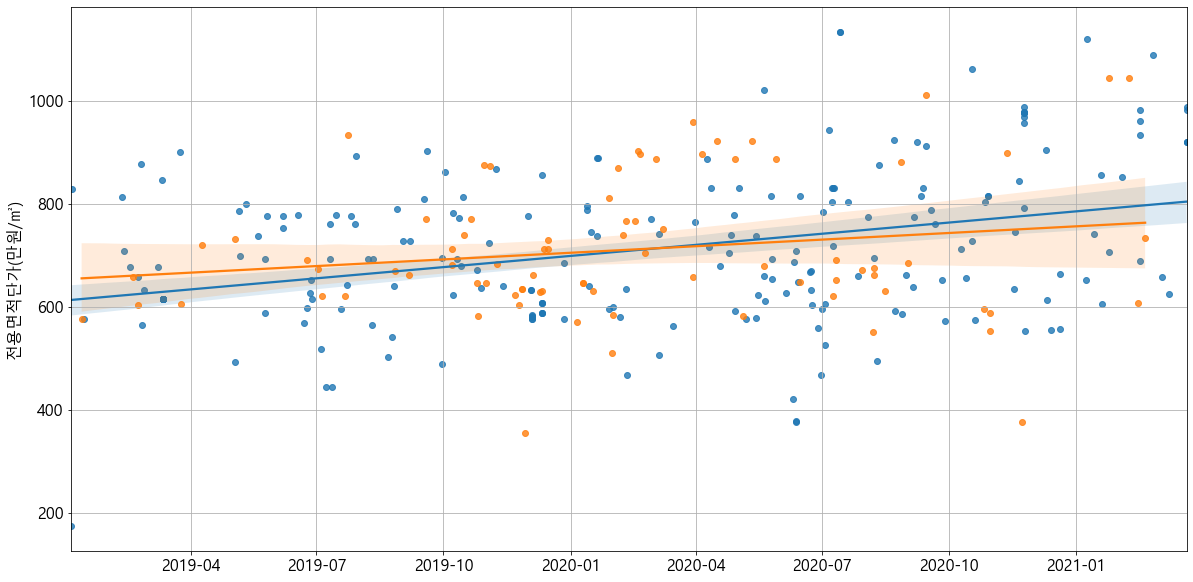

In [65]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
#plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(guro_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_df['계약날짜']), y=guro_df['전용면적단가(만원/㎡)'])
ax.xaxis.update_units(guro_officetel_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(guro_officetel_df['계약날짜']), y=guro_officetel_df['전용면적단가(만원/㎡)'])
#plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [80]:
guro_officetel_df['지번주소'].nunique()

16

In [81]:
guro_officetel_df['지번주소'].unique()

array(['서울특별시 구로구 구로동 104-6', '서울특별시 구로구 구로동 104-3', '서울특별시 구로구 구로동 97-0',
       '서울특별시 구로구 구로동 44-8', '서울특별시 구로구 구로동 97-8', '서울특별시 구로구 구로동 106-2',
       '서울특별시 구로구 구로동 104-8', '서울특별시 구로구 구로동 98-12',
       '서울특별시 구로구 구로동 642-88', '서울특별시 구로구 구로동 98-14',
       '서울특별시 구로구 구로동 1127-25', '서울특별시 구로구 구로동 508-7',
       '서울특별시 구로구 구로동 651-2', '서울특별시 구로구 구로동 512-2',
       '서울특별시 구로구 구로동 109-1', '서울특별시 구로구 구로동 1132-57'], dtype=object)

In [82]:
guro_officetel_df = officetel_merge_df[(officetel_merge_df['지번주소'].str.contains('구로동'))&
                                       (officetel_merge_df['계약날짜'].dt.year <= 2020)&
                                       (officetel_merge_df['계약날짜'].dt.year >= 2018)&
                                       (officetel_merge_df['건물연식'] <= 5)
                                      ]
print(guro_officetel_df.shape)
guro_officetel_df['지번주소'].nunique()

(104, 19)


16

In [83]:
guro_officetel_df['평균단가'] = guro_officetel_df[['지번주소', '전용면적단가(만원/㎡)']].groupby(['지번주소']).transform('mean')['전용면적단가(만원/㎡)']

In [85]:
summary_df['평균단가'].mean()

678.6862762827222